In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [6]:
df = pd.read_csv('D:/Semester 3/Data Mining/heart_disease_uci.csv')

In [9]:
display(df.isnull)

<bound method DataFrame.isnull of       id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  Fal

In [36]:
# 1. Identifikasi Missing Values
missing_values=df.isnull().sum().reset_index()
missing_values.columns=['column', 'Misiing Values']
print ('\nNilai yang Hilang :')
print (tabulate(missing_values) )



Nilai yang Hilang :
--  --------  ---
 0  id          0
 1  age         0
 2  sex         0
 3  dataset     0
 4  cp          0
 5  trestbps   59
 6  chol       30
 7  fbs        90
 8  restecg     2
 9  thalch     55
10  exang      55
11  oldpeak    62
12  slope     309
13  ca        611
14  thal      486
15  num         0
--  --------  ---


Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    float64
 1   age       920 non-null    float64
 2   sex       920 non-null    int32  
 3   dataset   920 non-null    int32  
 4   cp        920 non-null    int32  
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    bool   
 8   restecg   920 non-null    int32  
 9   thalch    920 non-null    float64
 10  exang     920 non-null    bool   
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    int32  
 13  ca        920 non-null    float64
 14  thal      920 non-null    int32  
 15  num       920 non-null    float64
dtypes: bool(2), float64(8), int32(6)
memory usage: 81.0 KB
None

Statistik Deskriptif Awal:
               id           age         sex     dataset          cp  \
count  920.00

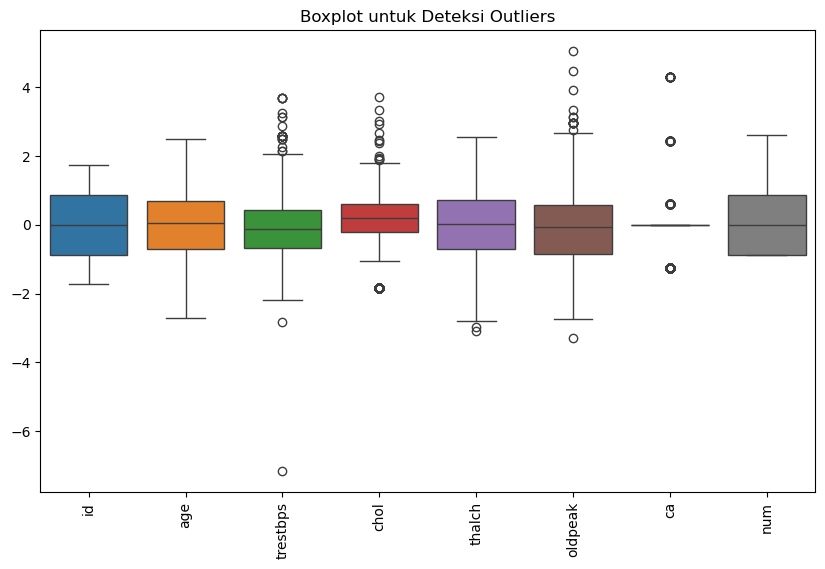


Data Setelah Preprocessing:
         id       age  sex  dataset  cp  trestbps      chol    fbs  restecg  \
0 -1.730169  1.007386    1        0   3  0.698041  0.311021   True        0   
1 -1.726404  1.432034    1        0   0  1.511761  0.797713  False        0   
2 -1.722639  1.432034    1        0   0 -0.658158  0.274289  False        0   
3 -1.718873 -1.752828    1        0   2 -0.115679  0.467130  False        1   
4 -1.715108 -1.328180    0        0   1 -0.115679  0.044717  False        0   

     thalch  exang   oldpeak  slope        ca  thal       num  
0  0.495698  False  1.349421      0 -1.249371     0 -0.871794  
1 -1.175955   True  0.589832      1  4.292099     1  0.879408  
2 -0.340128   True  1.634267      1  2.444942     2  0.003807  
3  1.968345  False  2.488805      0 -1.249371     1 -0.871794  
4  1.371326  False  0.494884      2 -1.249371     1 -0.871794  

Informasi Setelah Preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data c

In [41]:
print("Informasi Data:")
print(df.info())
print("\nStatistik Deskriptif Awal:")
print(df.describe())

# 2. Menangani Missing Values
# Imputasi mean untuk kolom numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].apply(lambda col: col.fillna(col.mean()))

# Imputasi modus untuk kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))

# 3. Encoding Data Kategorikal
# Contoh: Mengubah 'sex' menjadi 0 dan 1
df['sex'] = df['sex'].replace({'male': 0, 'female': 1})

# Encoding untuk kolom kategorikal lain yang mungkin ada
for col in categorical_cols:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# 4. Menangani Outliers
# Menampilkan boxplot untuk identifikasi outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_cols])
plt.title('Boxplot untuk Deteksi Outliers')
plt.xticks(rotation=90)
plt.show()

# Contoh penghapusan outliers jika dibutuhkan (opsional)
# df = df[(np.abs(df[numeric_cols] - df[numeric_cols].mean()) <= (3 * df[numeric_cols].std())).all(axis=1)]

# 5. Normalisasi Data
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# 6. Tampilkan Data Setelah Preprocessing
print("\nData Setelah Preprocessing:")
print(df.head())

# 7. Memeriksa Informasi Akhir
print("\nInformasi Setelah Preprocessing:")
print(df.info())

# Imputasi modus untuk kolom kategorikal
df[categorical_cols] = df[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))

# Menggunakan infer_objects() untuk memastikan tipe data setelah imputasi
df[categorical_cols] = df[categorical_cols].infer_objects(copy=False)

In [30]:
!pip install scikit-learn

In [9]:
mean_value = df["chol"].mean()
mean_value

199.13033707865168

In [11]:
df["chol"].fillna(mean_value, inplace=True)


C:\Users\Dafa\AppData\Local\Temp\ipykernel_15548\1891463894.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["chol"].fillna(mean_value, inplace=True)


In [13]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol          0
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [15]:
df1 = df.dropna()
df1.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64